In [2]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.io import loadmat

In [3]:
os.chdir(r'C:\STUDY\content\Andrew Ng\machine-learning-ex6\machine-learning-ex6\ex6')

In [4]:
raw_data = loadmat("ex6data1.mat")
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [10]:
X = raw_data['X'] 
y = raw_data['y']
type(X)
X ,y


(array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
        [1

In [15]:
data = pd.DataFrame(X,columns=['X1','X2'])
data['y'] = pd.DataFrame(y)

In [16]:
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


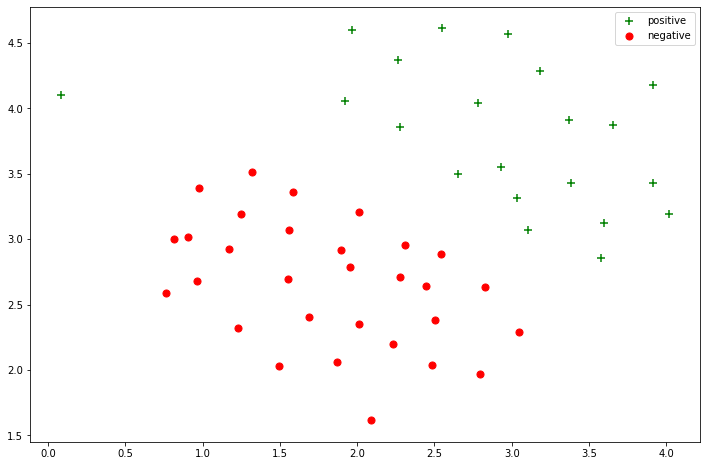

In [27]:
pos = data[data['y'].isin([1])]
neg = data[data['y'].isin([0])]
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['X1'],pos['X2'],s=50,c='g',marker='+',label='positive')
ax.scatter(neg['X1'],neg['X2'],s=50,c='r',marker='o',label='negative')
ax.legend()

# classifier 1 : C=1

In [80]:
from sklearn import svm
svc = svm.LinearSVC(C=1,loss='hinge',max_iter=3000)
classifier_1 = svc.fit(data[["X1","X2"]],data["y"])
classifier_1

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=3000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [81]:
classifier_1.score(data[['X1','X2']],data['y'])

0.9803921568627451

We can visualize this by looking at the *confidence level* for each class prediction, which is **a function of the point's distance from the hyperplane.**

interpretaion : the colour of points close to the decision boundary will be less denser than those 
                away from it.
            

Text(0.5, 1.0, 'C=1 svm confidence level')

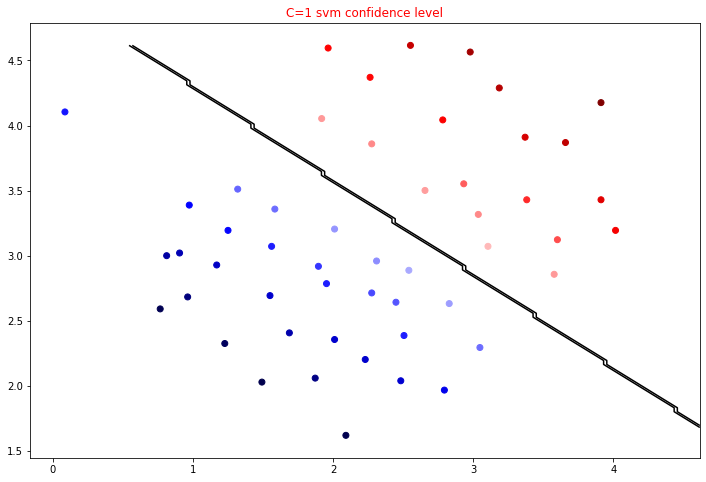

In [82]:
data['classifier_1_confidence'] = svc.decision_function(data[['X1','X2']])
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
ax.contour(X_1,X_2,classifier_1.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="black")
ax.scatter(data['X1'],data['X2'],c=data['classifier_1_confidence'],cmap='seismic')
ax.set_title("C=1 svm confidence level",c='r')

# classifier 2 : C=500

In [102]:
svc2 = svm.LinearSVC(C=500,loss='hinge',max_iter=100000)
classifier_2 = svc2.fit(data[['X1','X2']],data['y'])
classifier_2

C:\softwares\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=500, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=100000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [103]:
classifier_2.score(data[['X1','X2']],data['y'])

1.0

In [104]:
data['classifier_2_confidence'] = classifier_2.decision_function(data[['X1','X2']])
data.head()

,X1,X2,y,classifier_1_confidence,classifier_2_confidence
0,1.9643,4.5957,1,0.802759,11.736771
1,2.2753,3.8589,1,0.383838,5.949075
2,2.9781,4.5651,1,1.377400,14.833006
3,2.9320,3.5519,1,0.521085,5.294760
4,3.5772,2.8560,1,0.333314,1.000000


Text(0.5, 1.0, 'C=500 svm confidence level')

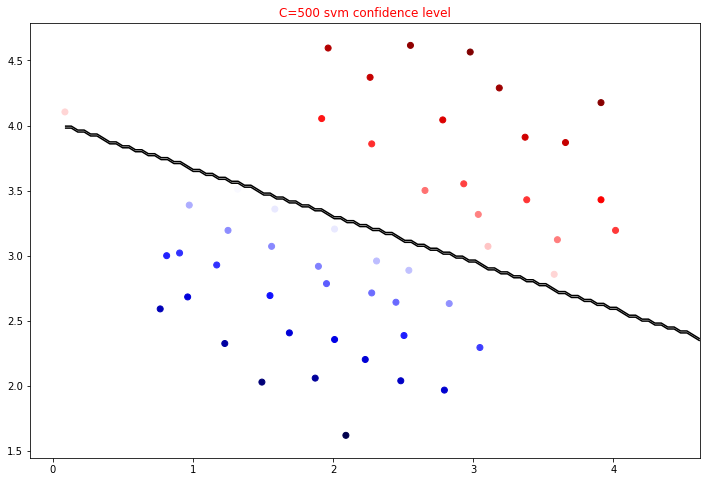

In [106]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))
ax.contour(X_1,X_2,classifier_2.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="black")
ax.scatter(data['X1'],data['X2'],c=data['classifier_2_confidence'],cmap='seismic')
ax.set_title("C=500 svm confidence level",c='r')